## Clustering

### Importing Libraries and Preparing Dataset

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir("C:\\Users\\GiantsV3\\Documents\\Ironhack\\Week3\\Project-Week-3-Song-Recommender")

In [3]:
playlist = pd.read_csv("data/complete_playlist.csv", index_col=0)
playlist.drop(labels=["Song", "Artist"], axis=1, inplace=True)

In [4]:
playlist.head()

,Danceability,Energy,Mode,Acousticness,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
0,0.483,0.721,1,0.729000,0.000000,0.1890,-6.836,0.0320,0.562,95.261
1,0.485,0.863,1,0.000012,0.016200,0.1380,-9.027,0.0495,0.767,116.835
2,0.364,0.457,0,0.290000,0.000106,0.9220,-14.162,0.0675,0.175,163.219
3,0.398,0.413,1,0.082200,0.000025,0.0891,-10.934,0.0388,0.331,133.574
4,0.725,0.853,1,0.034800,0.127000,0.1960,-7.842,0.0353,0.904,136.282


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
#initialize the transformer
scaler = StandardScaler()

In [7]:
playlist_scaled = scaler.fit_transform(playlist)

In [8]:
pd.DataFrame(playlist_scaled)

,0,1,2,3,4,5,6,7,8,9
0,-0.481844,0.409298,0.648886,1.387547,-0.444965,-0.008453,0.598586,-0.516460,-0.060479,-0.948046
1,-0.469755,1.025070,0.648886,-0.922022,-0.376795,-0.337948,0.027648,-0.280361,0.774640,-0.175476
2,-1.201143,-0.735517,-1.541104,-0.003287,-0.444519,4.727235,-1.310448,-0.037516,-1.637021,1.485546
3,-0.995629,-0.926320,0.648886,-0.661636,-0.444858,-0.653876,-0.469285,-0.424719,-1.001516,0.423951
4,0.980931,0.981706,0.648886,-0.811808,0.089454,0.036772,0.336439,-0.471938,1.332745,0.520926
...,...,...,...,...,...,...,...,...,...,...
9931,-0.155440,1.107462,0.648886,-0.920977,-0.444584,-0.454240,1.779028,-0.404482,0.949812,0.859225
9932,-2.156179,1.467385,0.648886,-0.922030,3.035068,1.141551,1.046789,0.117634,-1.665538,-1.042800
9933,-0.270286,0.456999,0.648886,1.514274,-0.444965,-0.260420,-0.058605,1.466771,0.835747,0.275411
9934,-0.288420,0.938341,0.648886,-0.921646,-0.444696,0.081997,0.597804,-0.552887,-0.231577,0.880568


#### Clustering

In [9]:
from sklearn.cluster import KMeans

In [11]:
#Initialize the model
kmeans = KMeans(n_clusters=8)

In [13]:
#Fit the model
kmeans.fit(playlist_scaled)

KMeans()

In [14]:
# Predicting / Assigning the clusters:
clusters = kmeans.predict(playlist_scaled)

In [17]:
clusters

array([7, 2, 6, ..., 7, 0, 2])

In [26]:
# Check the size of the clusters
pd.Series(clusters).value_counts()

2    2042
1    1605
0    1559
7    1382
3    1337
5     881
4     583
6     547
dtype: int64

In [22]:
# Explore the cluster assignment in the original dataset
playlist["Cluster"] = clusters

In [24]:
playlist.head()

,Danceability,Energy,Mode,Acousticness,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Cluster
0,0.483,0.721,1,0.729000,0.000000,0.1890,-6.836,0.0320,0.562,95.261,7
1,0.485,0.863,1,0.000012,0.016200,0.1380,-9.027,0.0495,0.767,116.835,2
2,0.364,0.457,0,0.290000,0.000106,0.9220,-14.162,0.0675,0.175,163.219,6
3,0.398,0.413,1,0.082200,0.000025,0.0891,-10.934,0.0388,0.331,133.574,0
4,0.725,0.853,1,0.034800,0.127000,0.1960,-7.842,0.0353,0.904,136.282,2


In [27]:
playlist.groupby(by="Cluster").mean()

,Danceability,Energy,Mode,Acousticness,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
Cluster,,,,,,,,,,
0,0.393305,0.760670,0.869147,0.112730,0.044478,0.179998,-7.032944,0.061474,0.414387,141.945146
1,0.632405,0.701423,0.000000,0.171512,0.039229,0.158104,-7.997027,0.057164,0.658037,119.881499
2,0.645084,0.753627,1.000000,0.134956,0.027796,0.152909,-7.389086,0.054225,0.741719,118.120517
3,0.447098,0.256518,0.688108,0.740637,0.091407,0.154428,-14.052419,0.041846,0.317561,109.425546
4,0.707343,0.678782,0.581475,0.191012,0.018474,0.210016,-8.190909,0.314154,0.604760,119.529964
5,0.544420,0.682400,0.687855,0.215396,0.753728,0.177002,-9.500486,0.058496,0.522844,125.847292
6,0.536088,0.731914,0.755027,0.233112,0.067487,0.637757,-8.065638,0.069593,0.594688,121.577174
7,0.624229,0.459635,0.952967,0.539998,0.020014,0.152380,-11.225151,0.051587,0.688638,116.710627


#### Finding the "inertia" of the model

In [28]:
kmeans.inertia_

52154.93785406543

#### Finding optimal number of clusters

In [29]:
K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(playlist_scaled)
    inertia.append(kmeans.inertia_)

print(inertia)

[82377.47298731141, 74460.62635168944, 68054.01516465611, 62374.311032771686, 57884.07752574058, 54318.86547119369, 52216.36838949956, 50106.09754925114, 48474.75910694261, 46702.56964811495, 45356.58172332479, 44060.577077244554, 43063.90848571823, 42208.7470744234, 41323.42716284971, 40679.51670608539, 39823.84376561022, 39241.59681312104]


Elbow Method

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

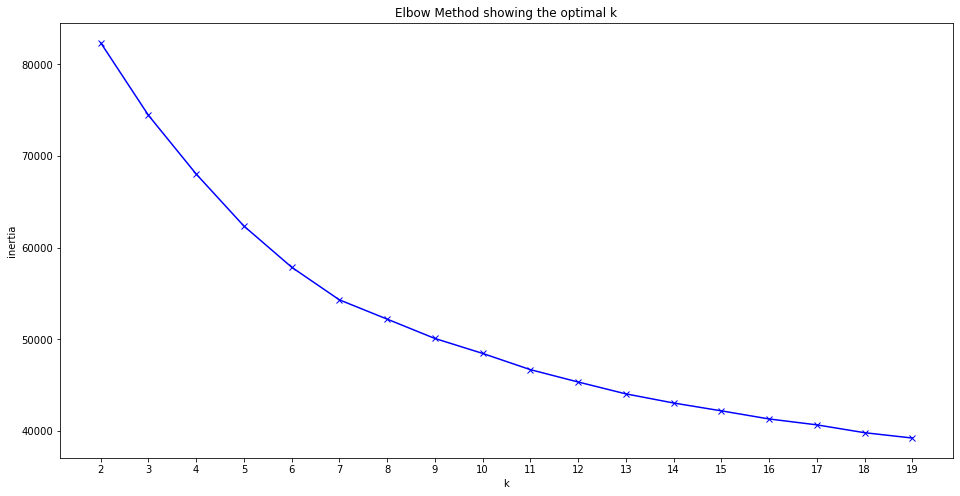

In [31]:
# Plot the results
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Silhoutte Score

In [32]:
from sklearn.metrics import silhouette_score

# repeat the same process, now with the silhouette score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(playlist_scaled)
    silhouette.append(silhouette_score(X=playlist_scaled, labels=kmeans.predict(playlist_scaled)))

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

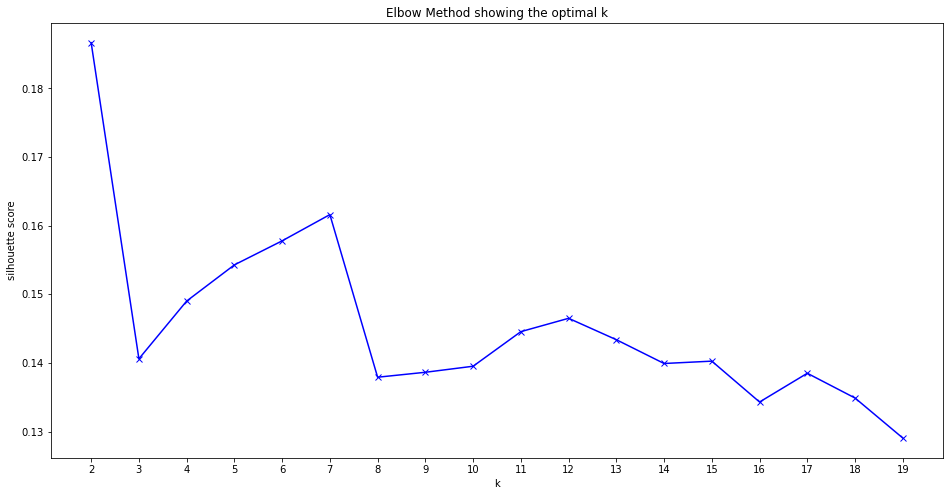

In [33]:
# plot
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Final Model

In [34]:
kmeans = KMeans(n_clusters=7)

In [35]:
kmeans.fit(playlist_scaled)

KMeans(n_clusters=7)

In [36]:
clusters = kmeans.predict(playlist_scaled)

In [40]:
clusters

array([5, 5, 0, ..., 5, 2, 5])

In [44]:
pd.Series(clusters).value_counts()

5    2532
6    1912
2    1760
4    1653
3     903
0     589
1     587
dtype: int64

In [45]:
playlist.groupby(by="Cluster").mean()

,Danceability,Energy,Mode,Acousticness,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
Cluster,,,,,,,,,,
0,0.393305,0.760670,0.869147,0.112730,0.044478,0.179998,-7.032944,0.061474,0.414387,141.945146
1,0.632405,0.701423,0.000000,0.171512,0.039229,0.158104,-7.997027,0.057164,0.658037,119.881499
2,0.645084,0.753627,1.000000,0.134956,0.027796,0.152909,-7.389086,0.054225,0.741719,118.120517
3,0.447098,0.256518,0.688108,0.740637,0.091407,0.154428,-14.052419,0.041846,0.317561,109.425546
4,0.707343,0.678782,0.581475,0.191012,0.018474,0.210016,-8.190909,0.314154,0.604760,119.529964
5,0.544420,0.682400,0.687855,0.215396,0.753728,0.177002,-9.500486,0.058496,0.522844,125.847292
6,0.536088,0.731914,0.755027,0.233112,0.067487,0.637757,-8.065638,0.069593,0.594688,121.577174
7,0.624229,0.459635,0.952967,0.539998,0.020014,0.152380,-11.225151,0.051587,0.688638,116.710627
